2.2 Multi-class classification [6 points]

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.preprocessing import scale

In [10]:
with np.load("notMNIST.npz") as data:
    Data, Target = data ["images"], data["labels"]
    np.random.seed(521)
    randIndx = np.arange(len(Data))
    np.random.shuffle(randIndx)
    Data = Data[randIndx]/255.
    Target = Target[randIndx]
    trainData, trainTarget = Data[:15000], Target[:15000]
    validData, validTarget = Data[15000:16000], Target[15000:16000]
    testData, testTarget = Data[16000:], Target[16000:]

#flatten the 2D features to 1D
trainData=np.reshape(trainData, [trainData.shape[0], 28*28]) 
validData=np.reshape(validData, [validData.shape[0], 28*28]) 
testData=np.reshape(testData, [testData.shape[0], 28*28])

trainTarget=np.expand_dims(trainTarget, 1)
validTarget=np.expand_dims(validTarget, 1)
testTarget=np.expand_dims(testTarget, 1)

In [11]:
print(trainData.shape)
print(trainTarget.shape)

(15000, 784)
(15000, 1)


In [12]:
def part2_main(decay_lambda, iterations, mini_batch_size, learning_rate, num_classes):
    num_features=trainData.shape[1]
    
    X = tf.placeholder(dtype=tf.float64,shape=[None, num_features])
    Y = tf.placeholder(dtype=tf.int64,shape=[None, 1])
    
    W = tf.Variable(tf.zeros(dtype=tf.float64, shape=[num_features, num_classes]))
    b = tf.Variable(tf.zeros(dtype=tf.float64, shape=[num_classes]))
    
    #actual labels in one-hot vector form
    true_Y = tf.one_hot(Y, depth = num_classes)
    
    pred_Y = tf.matmul(X,W)+b
    
    
    
    Loss_D = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=true_Y,logits=pred_Y))
    Loss_W = 0.5*decay_lambda*tf.reduce_sum(tf.square(W))
    total_loss = Loss_D + Loss_W
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(total_loss)
    train_set_size = trainData.shape[0]
    n_batch = train_set_size // mini_batch_size + (train_set_size % mini_batch_size != 0)
    init = tf.global_variables_initializer()
    
    #define an accuracy op for validation accuracy rate
    accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.squeeze(Y), tf.argmax(pred_Y, axis=1)), tf.float64))
    
    with tf.Session() as sess:
        points=[[],[]]
        sess.run(init)
        
        for step in range(iterations):
            i_batch = (step%n_batch)*mini_batch_size
            xs = trainData[i_batch:i_batch+mini_batch_size]
            ys = trainTarget[i_batch:i_batch+mini_batch_size]
            cost = sess.run(total_loss, feed_dict={X:xs, Y:ys})
            sess.run(optimizer, feed_dict={X:xs, Y:ys})
            
            if(step%n_batch==0):
                epoch_number = step/n_batch
                points[0].append(epoch_number)
                points[1].append(cost)
    
        # Accuracy Rate for Validation Set
        print("When Learning Rate is",learning_rate, "Accuracy Rate for Validation Set =",sess.run(accuracy, feed_dict={X:validData, Y:validTarget}))
            
    
    
    return points

When Learning Rate is 0.005 Accuracy Rate for Validation Set = 0.887


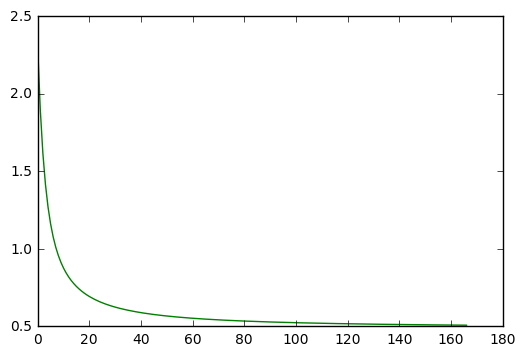

In [15]:
points = part2_main(decay_lambda=0.01, iterations=5000, mini_batch_size=500, learning_rate=0.005, num_classes=10)
plt.plot(points[0], points[1], 'g')

plt.show()